In [1]:
# Import Libraries

import cv2
import numpy as np
import matplotlib.pyplot as plt

Q1.

In [2]:
# Import the original image
img = cv2.imread(r'overlap_coins.jpg', cv2.IMREAD_COLOR)

# Convert into grayscale
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Perform Thresholding
ret, thresh = cv2.threshold(imgGray, 50, 255, 0)

# Take the inverse of the image to make the background to black
imgInverse = cv2.bitwise_not(thresh)

# Create a Rectangular Kernel as the SE
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))

# Perform Erosion to seperate overlaps of the objects
erosion = cv2.erode(imgInverse, kernel, iterations=3)

# Get eroted image copies
eroCopy_contours = erosion.copy()
eroCopy_drawContours = erosion.copy()
eroCopy_drawContoursBGR = cv2.cvtColor(eroCopy_drawContours,cv2.COLOR_GRAY2BGR)

# Find Contours
contours, hierarchy = cv2.findContours(eroCopy_contours, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw Contours
imgWithContours = cv2.drawContours(eroCopy_drawContoursBGR,contours,-1,(0,255,0),2)

(a)

Number of Coins =  22


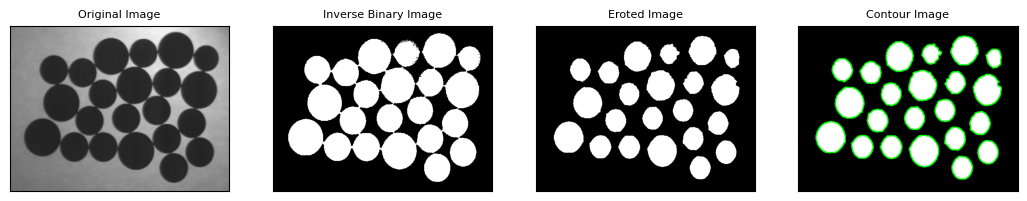

In [3]:
# Number of coins available in the image
totalCoins = len(contours)

print("Number of Coins = ", totalCoins)

# Plots

titles = ["Original Image", "Inverse Binary Image", "Eroted Image", "Contour Image"]
images = [img, imgInverse, erosion, imgWithContours]

plt.figure(figsize=(13,10), num='test.img')

for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.title(titles[i], fontsize = 8)
    plt.xticks([]), plt.yticks([])
    plt.imshow(images[i], 'gray')

(b)

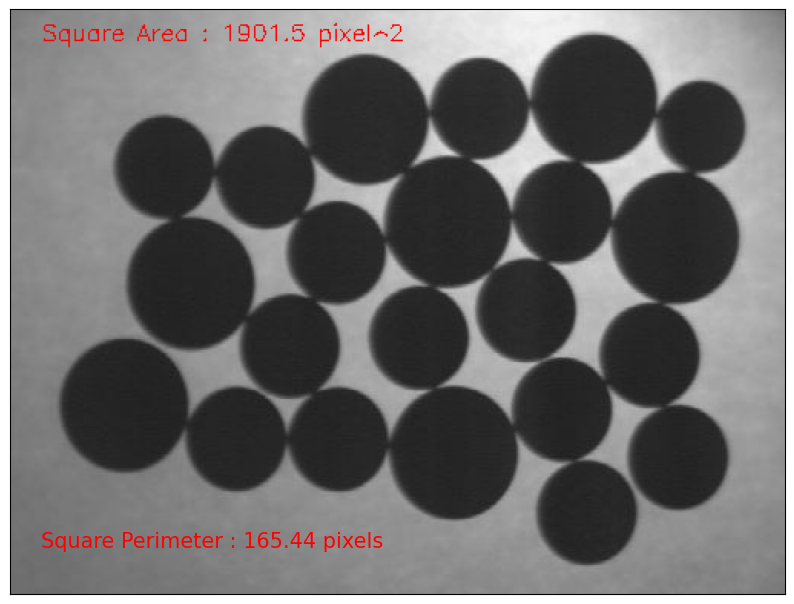

In [4]:
# Area
area = cv2.contourArea(contours[0])

# writing texts
position =(20, 20)      # (y, x)
text = "Square Area : " + str(area) + " pixel^2"

cv2.putText(img,        # numpy array on which text is written
            text,       # text
            position,   # position at which writing has to start
            cv2.FONT_HERSHEY_SIMPLEX,   # font family
            0.5,        # font size
            (255,0,0,255),            # font color
            1)          # font stroke

# Perimeter
# Second argument - whether a closed contour or just a curve

perimeter = cv2.arcLength(contours[1], True)
perimeter = "{0:.2f}".format(perimeter)
position1 = (20, 30)   # (x, y)
text1 = "Square Perimeter : " + str(perimeter) + " pixels"

# x, y plotting

plt.figure(figsize=(10,10), num='test.img')

plt.text(20, 350, text1, fontsize=15, color='r')
plt.xticks([]), plt.yticks([])
plt.imshow(img, 'gray') 

Q2.

In [5]:
# Load coins image
img = cv2.imread(r'overlap_coins.jpg', cv2.IMREAD_GRAYSCALE)

In [6]:
# Apply Sobel operator
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)  # Sobel edge detection on the X axis
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)  # Sobel edge detection on the Y axis
sobel = cv2.magnitude(sobelx, sobely)               # Combine both directions

# Apply Laplacian operator
laplacian = cv2.Laplacian(img, cv2.CV_64F)

# Apply Canny edge detector
canny = cv2.Canny(img, 100, 200)

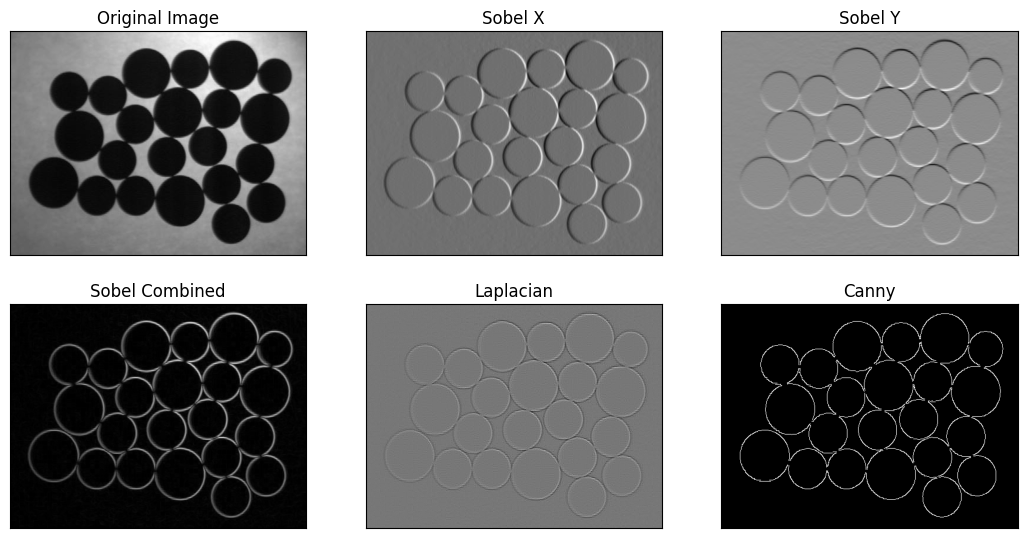

In [7]:
# Plotting

titles = ["Original Image", "Sobel X", "Sobel Y", "Sobel Combined", "Laplacian", "Canny"]
images = [img, sobelx, sobely, sobel, laplacian, canny]

plt.figure(figsize=(13,13), num='test.img')

for i in range(6):
    if i<3:
        plt.subplot(1, 3, i+1)
        plt.title(titles[i])
        plt.xticks([]), plt.yticks([])
        plt.imshow(images[i], 'gray')
    else:
        plt.subplot(2, 3, i+1)
        plt.title(titles[i])
        plt.xticks([]), plt.yticks([])
        plt.imshow(images[i], 'gray')

Q3.

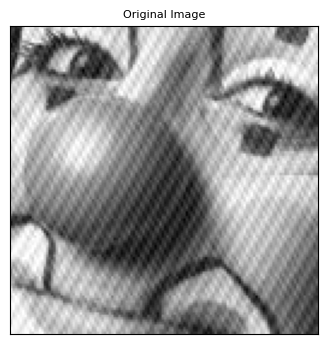

In [8]:
# Load coins image
noisyImg = cv2.imread(r'clown.jpg', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(4,4), num='test.img')

plt.subplot(1, 1, 1)
plt.title("Original Image", fontsize = 8)
plt.xticks([]), plt.yticks([])
plt.imshow(noisyImg, 'gray')

In [9]:
# Spatial Domain Smoothing Operations
# 1. Apply Gaussian blur
gaussianBlur = cv2.GaussianBlur(noisyImg, (5, 5), 0)

# 2. Apply Median blur
medianBlur = cv2.medianBlur(noisyImg, 5)

# 3. Apply Bilateral filter
bilateralFilter = cv2.bilateralFilter(noisyImg, 9, 75, 75)

# 4. Apply Averaging               
averaging = cv2.blur(noisyImg, (5,5))  

In [10]:
# Frequency Domain Smoothing Operation
# 1. Low-pass Filter

# Perform DFT
dft = cv2.dft(np.float32(noisyImg), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

# Create a mask with a low-pass filter
rows, cols = noisyImg.shape
crow, ccol = rows // 2, cols // 2
mask = np.zeros((rows, cols, 2), np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1

# Apply the mask and inverse DFT
fshift = dft_shift * mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

# 2. High-pass Filter

# Create a mask with a high-pass filter
mask = np.ones((rows, cols, 2), np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 0

# Apply the mask and inverse DFT
fshift = dft_shift * mask
f_ishift = np.fft.ifftshift(fshift)
img_back_hp = cv2.idft(f_ishift)
img_back_hp = cv2.magnitude(img_back_hp[:, :, 0], img_back_hp[:, :, 1])

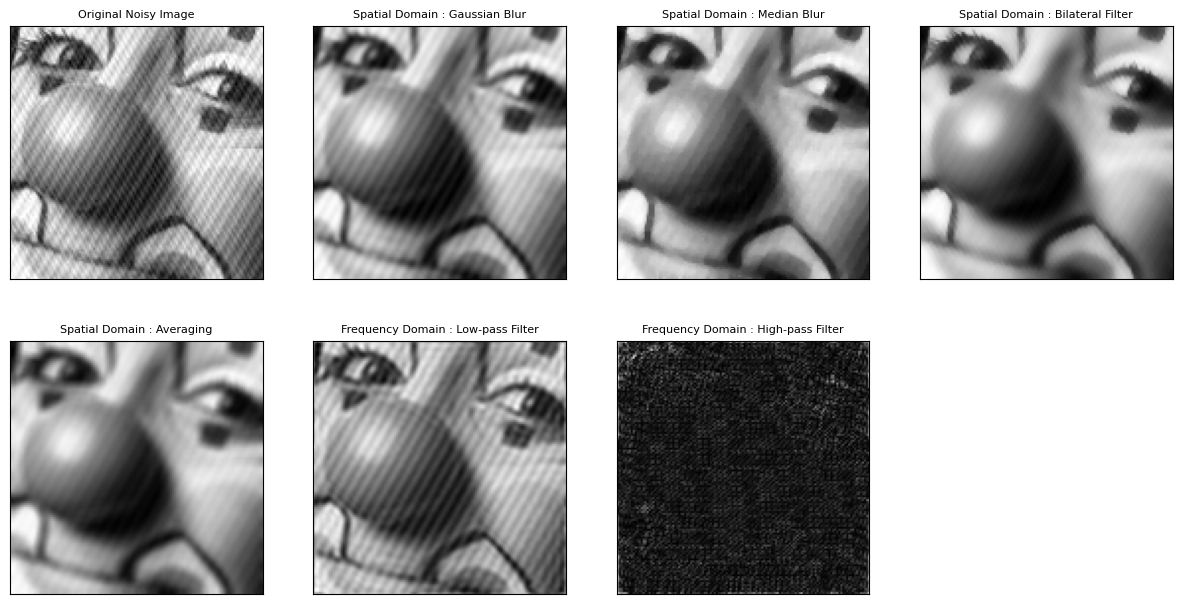

In [11]:
# Plots

titles = ["Original Noisy Image", "Spatial Domain : Gaussian Blur", "Spatial Domain : Median Blur", "Spatial Domain : Bilateral Filter",
           "Spatial Domain : Averaging", "Frequency Domain : Low-pass Filter", "Frequency Domain : High-pass Filter"]
images = [noisyImg, gaussianBlur, medianBlur, bilateralFilter, averaging, img_back, img_back_hp]

plt.figure(figsize=(15, 15), num='test.img')

for i in range(7):
    if i<4:
        plt.subplot(1, 4, i+1)
        plt.title(titles[i], fontsize=8)
        plt.xticks([]), plt.yticks([])
        plt.imshow(images[i], 'gray')
    else:
        plt.subplot(2, 4, i+1)
        plt.title(titles[i], fontsize=8)
        plt.xticks([]), plt.yticks([])
        plt.imshow(images[i], 'gray')